# Wine Wine Quality

The goal is to predict quality of the wine (red or white).
It can be classification or regression. Here we go with regression, try to predict the quality score.

### Data set information:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
The data set is publicly available.
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Data set description:

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)

### ML models:
1. Linear Regression
2. Polynomial Regression
3. Decision Tree Regression
4. Random Forest Regression
5. XGBoost
6. CatBoost
###Additional:
7. XGBoost Hyperparameter Tuning

## Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
sns.set()
%matplotlib inline

In [2]:
!pip install catboost

     |████████████████████████████████| 66.3MB 54kB/s 


In [3]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=";")
white_wine = pd.read_csv('winequality-white.csv', delimiter=";")

## Exploratory Data Analysis

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Since there are some big differences in properties between white and red wine (residual sugar, free sulfur dioxide, total sulfure dioxide) I'll not concatenate the data set, otherwise large outliers would occur.
Therefore, for the sake of clarity and simplicity, I'll separate red and white wines into separate Python notebooks and this will be white wine notebook.

In [10]:
dataset = white_wine.copy()

In [11]:
dataset.duplicated().sum()

937

It is unknown whether these are actual duplicates or more wines have the same properties and given that it is 19%, I'll not drop them, for now.

In [12]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine color']

### Numerical Columns

In [14]:
# Function for drawing numerical columns. Need to pass dimension (size_x and size_y), column name, and title.
def numerical_columns_histplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    
    ax.hist(dataset[column])
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)

    sns.despine()

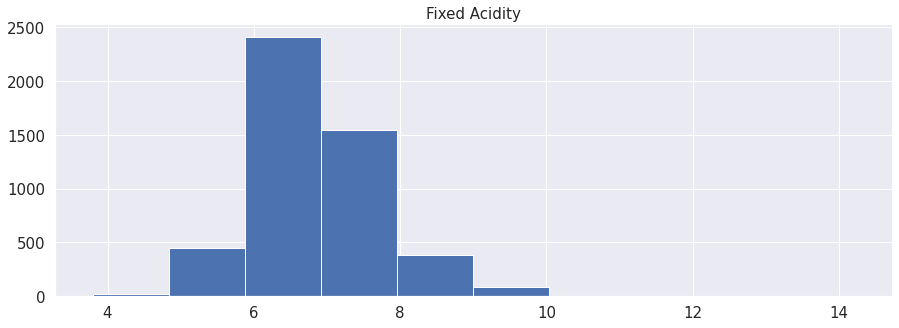

In [15]:
numerical_columns_histplot(15, 5, columns[0], "Fixed Acidity")

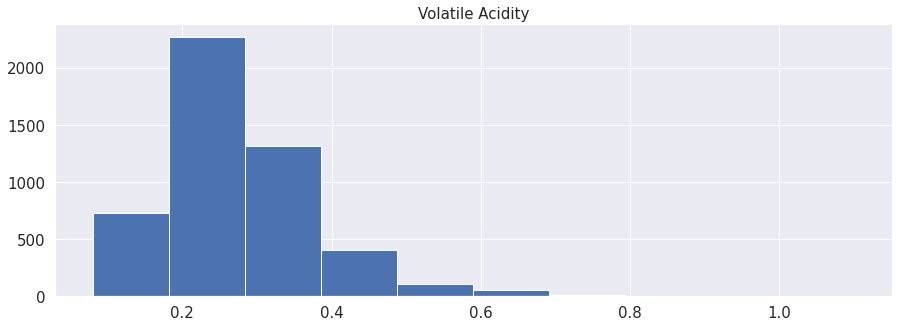

In [16]:
numerical_columns_histplot(15, 5, columns[1], "Volatile Acidity")

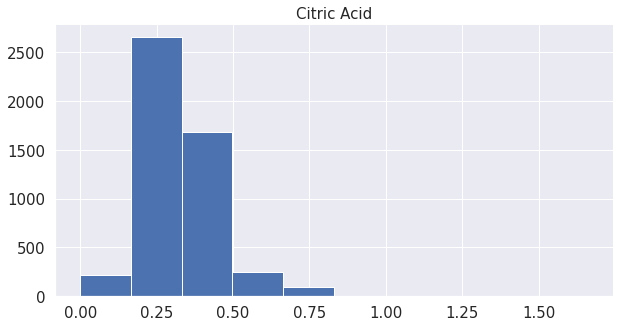

In [17]:
numerical_columns_histplot(10, 5, columns[2], "Citric Acid")

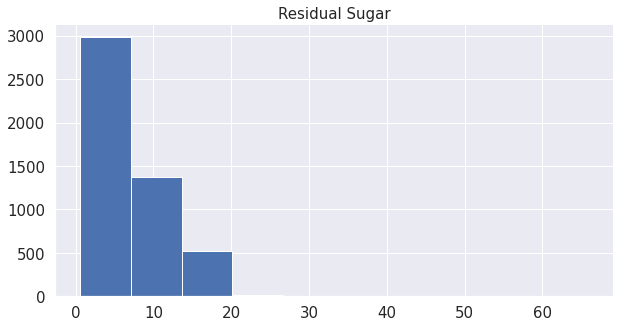

In [18]:
numerical_columns_histplot(10, 5, columns[3], "Residual Sugar")

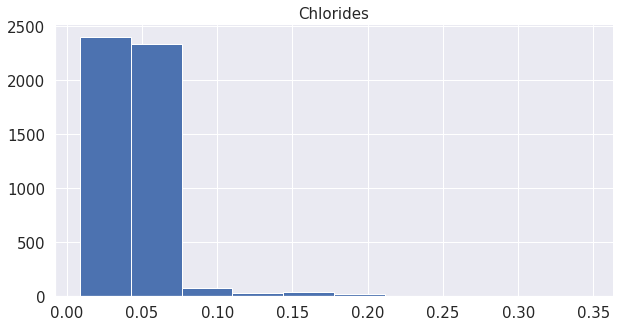

In [19]:
numerical_columns_histplot(10, 5, columns[4], "Chlorides")

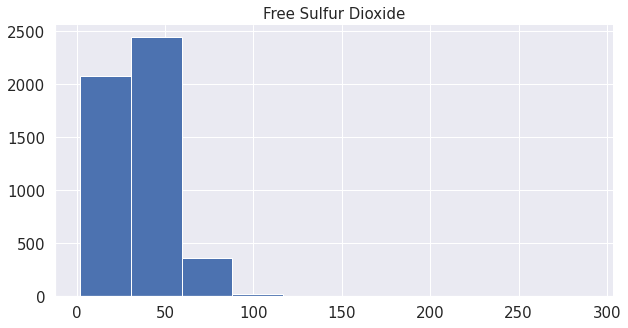

In [20]:
numerical_columns_histplot(10, 5, columns[5], "Free Sulfur Dioxide")

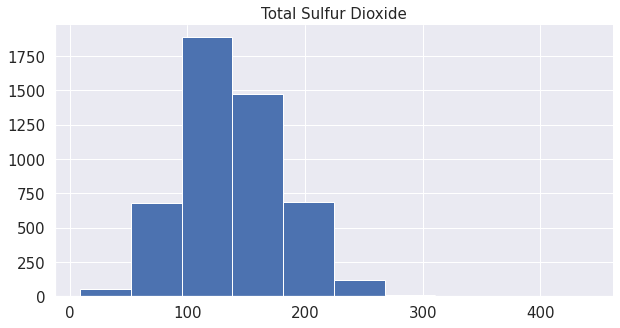

In [21]:
numerical_columns_histplot(10, 5, columns[6], "Total Sulfur Dioxide")

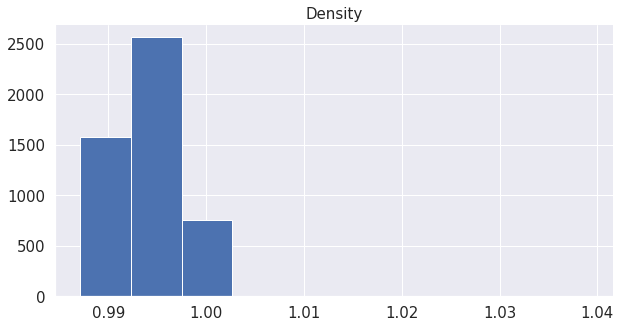

In [22]:
numerical_columns_histplot(10, 5, columns[7], "Density")

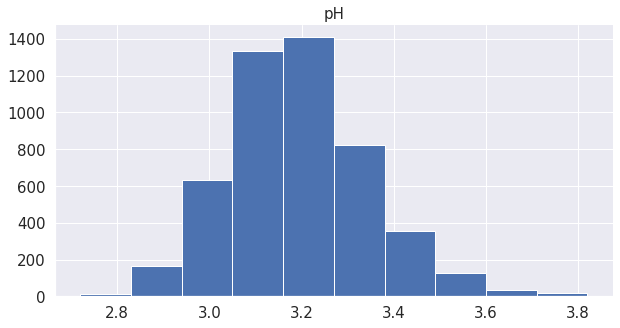

In [23]:
numerical_columns_histplot(10, 5, columns[8], "pH")

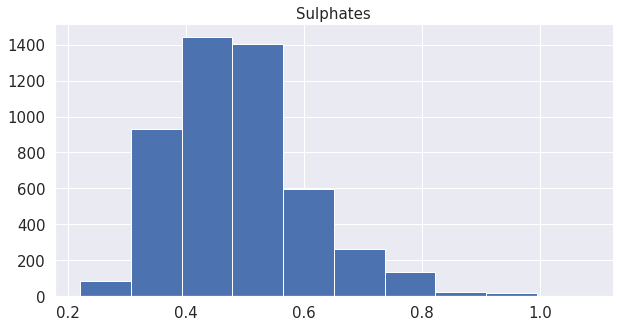

In [24]:
numerical_columns_histplot(10, 5, columns[9], "Sulphates")

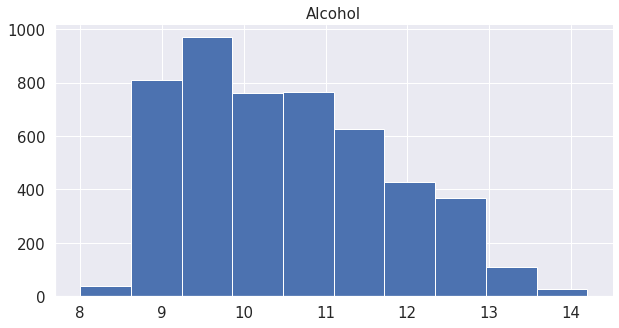

In [25]:
numerical_columns_histplot(10, 5, columns[10], "Alcohol")

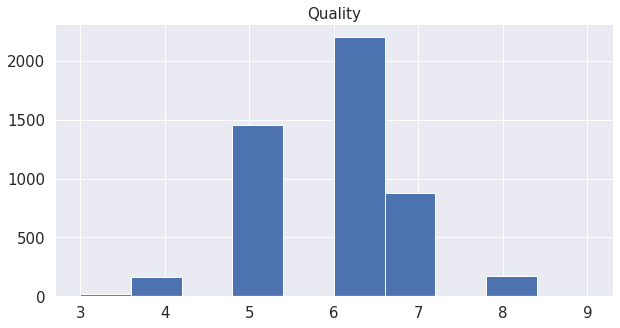

In [26]:
numerical_columns_histplot(10, 5, columns[11], "Quality")

### Comparing the Dependent variable with Independent variables

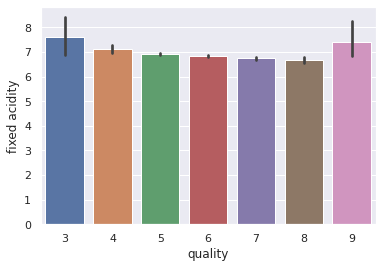

In [27]:
sns.barplot(x = "quality", y = columns[0], data = dataset)

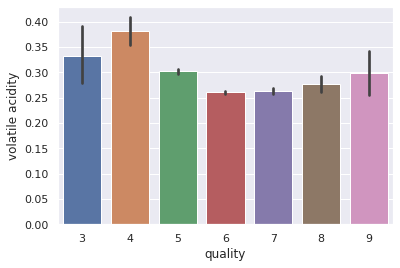

In [28]:
sns.barplot(x = "quality", y = columns[1], data = dataset)

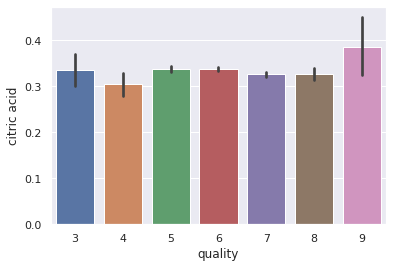

In [29]:
sns.barplot(x = "quality", y = columns[2], data = dataset)

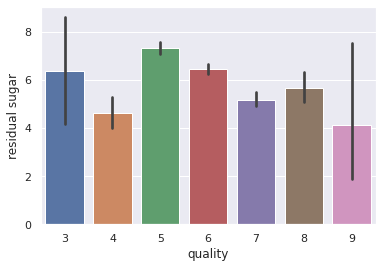

In [30]:
sns.barplot(x = "quality", y = columns[3], data = dataset)

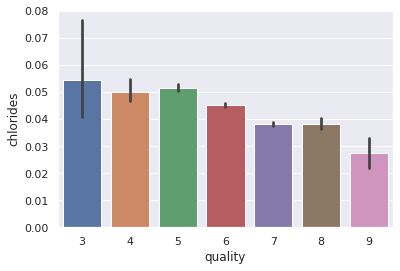

In [31]:
sns.barplot(x = "quality", y = columns[4], data = dataset)

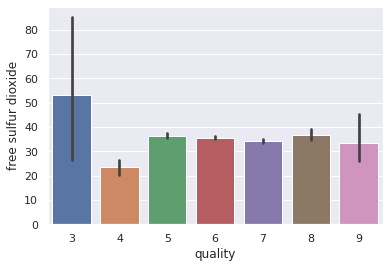

In [32]:
sns.barplot(x = "quality", y = columns[5], data = dataset)

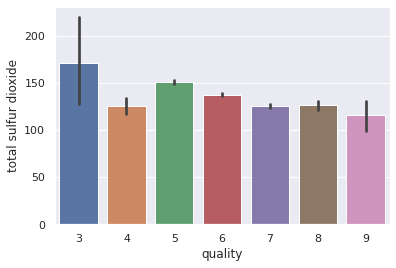

In [33]:
sns.barplot(x = "quality", y = columns[6], data = dataset)

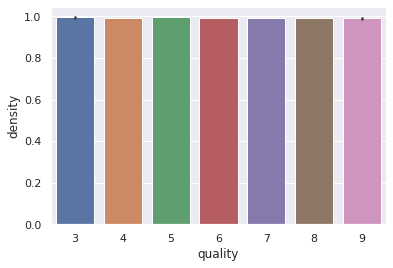

In [34]:
sns.barplot(x = "quality", y = columns[7], data = dataset)

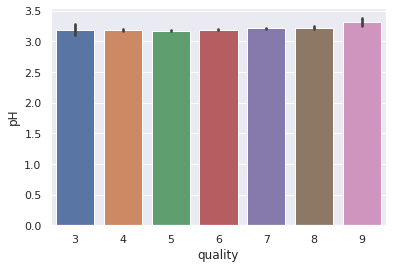

In [35]:
sns.barplot(x = "quality", y = columns[8], data = dataset)

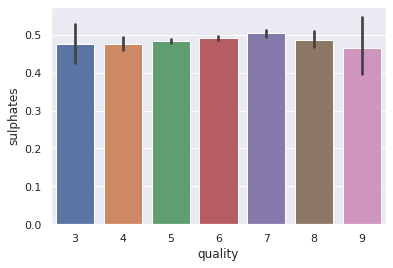

In [36]:
sns.barplot(x = "quality", y = columns[9], data = dataset)

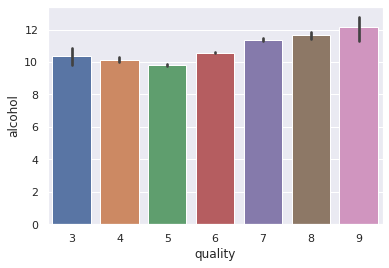

In [37]:
sns.barplot(x = "quality", y = columns[10], data = dataset)

### Searching for Outliers

In the previous version, I left all the outliers and in this version I'll drop the most critial ones.

In [38]:
def iqr_outliers(dataset):
    outliers = []
    
    for i in dataset:
        first_quartile = dataset.quantile(0.25)
        third_quartile = dataset.quantile(0.75)

        iqr = third_quartile - first_quartile
        lower_whisker = first_quartile - 1.5 * iqr
        uppwer_whisker = third_quartile + 1.5 * iqr
        
        if i > uppwer_whisker or i < lower_whisker:
            outliers.append(i)
        outliers.sort()
    
    print(f"Outliers: {len(outliers)} => {outliers}")

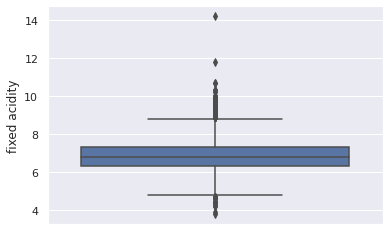

In [39]:
sns.boxplot(y=columns[0], data=dataset)

In [40]:
iqr_outliers(dataset[columns[0]])

Outliers: 119 => [3.8, 3.9, 4.2, 4.2, 4.4, 4.4, 4.4, 4.5, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 8.9, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.1, 9.1, 9.1, 9.1, 9.1, 9.1, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.2, 9.3, 9.3, 9.3, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.5, 9.5, 9.6, 9.6, 9.6, 9.6, 9.6, 9.7, 9.7, 9.7, 9.7, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.9, 9.9, 10.0, 10.0, 10.0, 10.2, 10.3, 10.3, 10.7, 10.7, 11.8, 14.2]


In [41]:
index_names = dataset[dataset[columns[0]] > 10].index 
dataset.drop(index_names, inplace = True) 

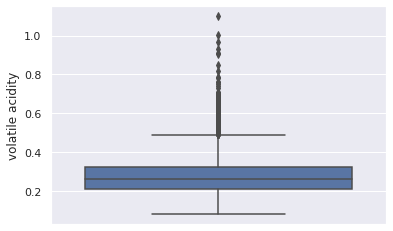

In [42]:
sns.boxplot(y=columns[1], data=dataset)

In [43]:
iqr_outliers(dataset[columns[1]])

Outliers: 186 => [0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.495, 0.495, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.53, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.545, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.555, 0.555, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.56, 0.57, 0.57, 0.57, 0.57, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.585, 0.585, 0.59, 0.59, 0.59, 0.59, 0.595, 0.595, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.615, 0.615, 0.615, 0.615, 0.62, 0.62, 0.62, 0.62, 0.62, 0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.65, 0.65, 0.655, 0.655, 0.655, 0.66, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.67, 0.67, 0.68, 0.68, 0.68, 0.685, 0.69, 0.

In [44]:
index_names = dataset[dataset[columns[1]] > 0.6].index 
dataset.drop(index_names, inplace = True) 

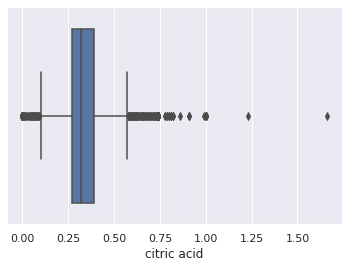

In [45]:
sns.boxplot(x=columns[2], data=dataset)

In [46]:
iqr_outliers(dataset[columns[2]])

Outliers: 250 => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.59, 0.59, 0.59, 0.59, 0.59, 0.59, 0.6, 0.6, 0.6, 0.6, 0.6, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.63, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.69, 0.69, 0.69, 0.69, 0.69, 0

In [47]:
index_names = dataset[dataset[columns[2]] > 0.64].index 
dataset.drop(index_names, inplace = True) 

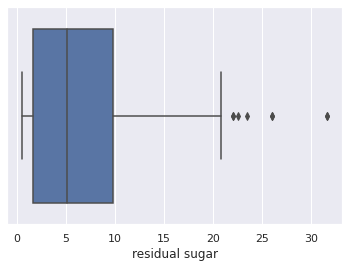

In [48]:
sns.boxplot(x=columns[3], data=dataset)

In [49]:
iqr_outliers(dataset[columns[3]])

Outliers: 8 => [22.0, 22.0, 22.6, 23.5, 26.05, 26.05, 31.6, 31.6]


In [50]:
index_names = dataset[dataset[columns[3]] > 22].index 
dataset.drop(index_names, inplace = True) 

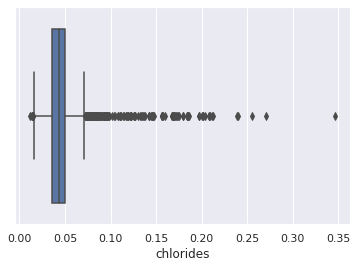

In [51]:
sns.boxplot(x=columns[4], data=dataset)

In [52]:
iqr_outliers(dataset[columns[4]])

Outliers: 177 => [0.012, 0.013999999999999999, 0.013999999999999999, 0.013999999999999999, 0.013999999999999999, 0.015, 0.015, 0.015, 0.015, 0.07200000000000001, 0.07200000000000001, 0.073, 0.073, 0.073, 0.073, 0.073, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.07400000000000001, 0.075, 0.075, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.076, 0.077, 0.078, 0.078, 0.079, 0.079, 0.08, 0.08, 0.08, 0.081, 0.081, 0.08199999999999999, 0.08199999999999999, 0.083, 0.083, 0.083, 0.083, 0.084, 0.084, 0.084, 0.084, 0.084, 0.085, 0.085, 0.085, 0.086, 0.086, 0.086, 0.086, 0.087, 0.087, 0.087, 0.08800000000000001, 0.08900000000000001, 0.09, 0.09, 0.091, 0.092, 0.092, 0.092, 0.09300000000000001, 0.09300000000000001, 0.09300000000000001, 0.094, 0.094, 0.094, 0.094, 0.094, 0.095, 0.095, 0.096, 0.096, 0.096, 0.096, 0.096, 0.096, 0.09699999999999999, 0.098, 0.098, 0.098, 0.102, 0.10400000000000001, 0.105, 0.10800000000000001, 0.10800000

In [53]:
index_names = dataset[dataset[columns[4]] > 0.2].index 
dataset.drop(index_names, inplace = True) 

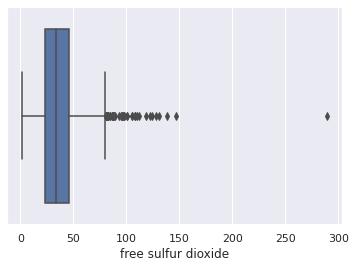

In [54]:
sns.boxplot(x=columns[5], data=dataset)

In [55]:
iqr_outliers(dataset[columns[5]])

Outliers: 49 => [81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 82.0, 82.0, 82.5, 83.0, 83.0, 83.0, 83.0, 85.0, 85.0, 86.0, 86.0, 87.0, 87.0, 87.0, 87.0, 88.0, 89.0, 93.0, 95.0, 96.0, 96.0, 96.0, 97.0, 98.0, 98.0, 98.0, 101.0, 101.0, 105.0, 105.0, 108.0, 108.0, 108.0, 110.0, 112.0, 118.5, 122.5, 124.0, 128.0, 131.0, 138.5, 146.5, 289.0]


In [56]:
index_names = dataset[dataset[columns[5]] > 89].index 
dataset.drop(index_names, inplace = True) 

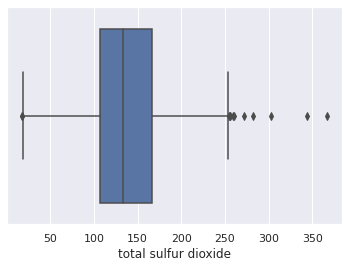

In [57]:
sns.boxplot(x=columns[6], data=dataset)

In [58]:
iqr_outliers(dataset[columns[6]])

Outliers: 12 => [18.0, 18.0, 255.0, 256.0, 256.0, 259.0, 260.0, 272.0, 282.0, 303.0, 344.0, 366.5]


In [59]:
index_names = dataset[dataset[columns[6]] > 255].index 
dataset.drop(index_names, inplace = True) 

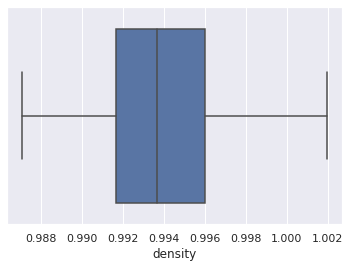

In [60]:
sns.boxplot(x=columns[7], data=dataset)

In [61]:
iqr_outliers(dataset[columns[7]])

Outliers: 0 => []


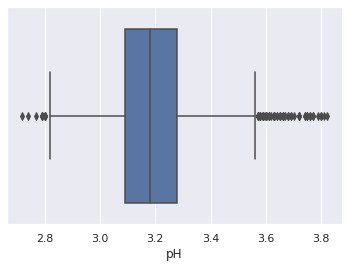

In [62]:
sns.boxplot(x=columns[8], data=dataset)

In [63]:
iqr_outliers(dataset[columns[8]])

Outliers: 69 => [2.72, 2.74, 2.77, 2.79, 2.79, 2.79, 2.8, 2.8, 2.8, 3.57, 3.57, 3.57, 3.57, 3.57, 3.58, 3.58, 3.58, 3.59, 3.59, 3.59, 3.59, 3.59, 3.59, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.61, 3.61, 3.61, 3.62, 3.63, 3.63, 3.63, 3.63, 3.63, 3.64, 3.64, 3.65, 3.65, 3.65, 3.66, 3.66, 3.66, 3.67, 3.68, 3.68, 3.69, 3.69, 3.7, 3.72, 3.72, 3.72, 3.74, 3.74, 3.75, 3.75, 3.76, 3.76, 3.77, 3.77, 3.79, 3.8, 3.8, 3.81, 3.82]


In [64]:
index_names = dataset[dataset[columns[8]] > 3.62].index 
dataset.drop(index_names, inplace = True) 

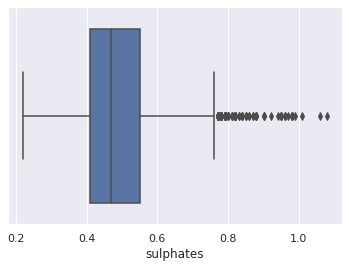

In [65]:
sns.boxplot(x=columns[9], data=dataset)

In [66]:
iqr_outliers(dataset[columns[9]])

Outliers: 113 => [0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.78, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.79, 0.8, 0.8, 0.8, 0.8, 0.8, 0.81, 0.81, 0.81, 0.81, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.83, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85, 0.85, 0.85, 0.86, 0.86, 0.87, 0.87, 0.88, 0.88, 0.88, 0.88, 0.88, 0.9, 0.9, 0.9, 0.92, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.96, 0.96, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 1.01, 1.06, 1.08]


In [67]:
index_names = dataset[dataset[columns[9]] > 0.9].index 
dataset.drop(index_names, inplace = True) 

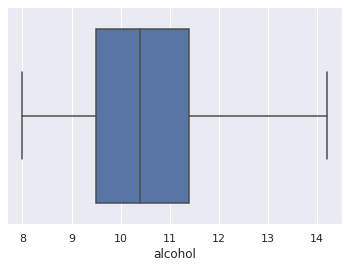

In [68]:
sns.boxplot(x=columns[10], data=dataset)

In [69]:
iqr_outliers(dataset[columns[10]])

Outliers: 0 => []


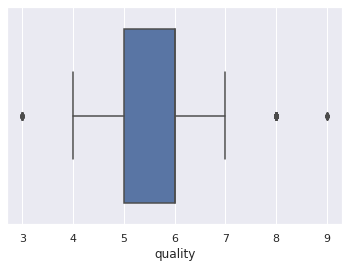

In [70]:
sns.boxplot(x=columns[11], data=dataset)

In [71]:
iqr_outliers(dataset[columns[11]])

Outliers: 0 => []


In [78]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000
mean,6.849402,0.272629,0.325022,6.352947,0.044592,34.812418,137.267725,0.993955,3.186425,0.486418,10.534232,5.903871
std,0.814629,0.087858,0.098979,4.940171,0.017326,15.614983,41.329543,0.002892,0.143363,0.108055,1.224936,0.874246
min,3.900000,0.080000,0.000000,0.600000,0.012000,2.000000,18.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,107.000000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,133.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.800000,0.050000,45.000000,166.000000,0.996000,3.280000,0.540000,11.400000,6.000000
max,10.000000,0.600000,0.640000,22.000000,0.200000,89.000000,255.000000,1.001960,3.620000,0.900000,14.200000,9.000000


Dropped 6% of data because of outliers.

## Correlation Matrix

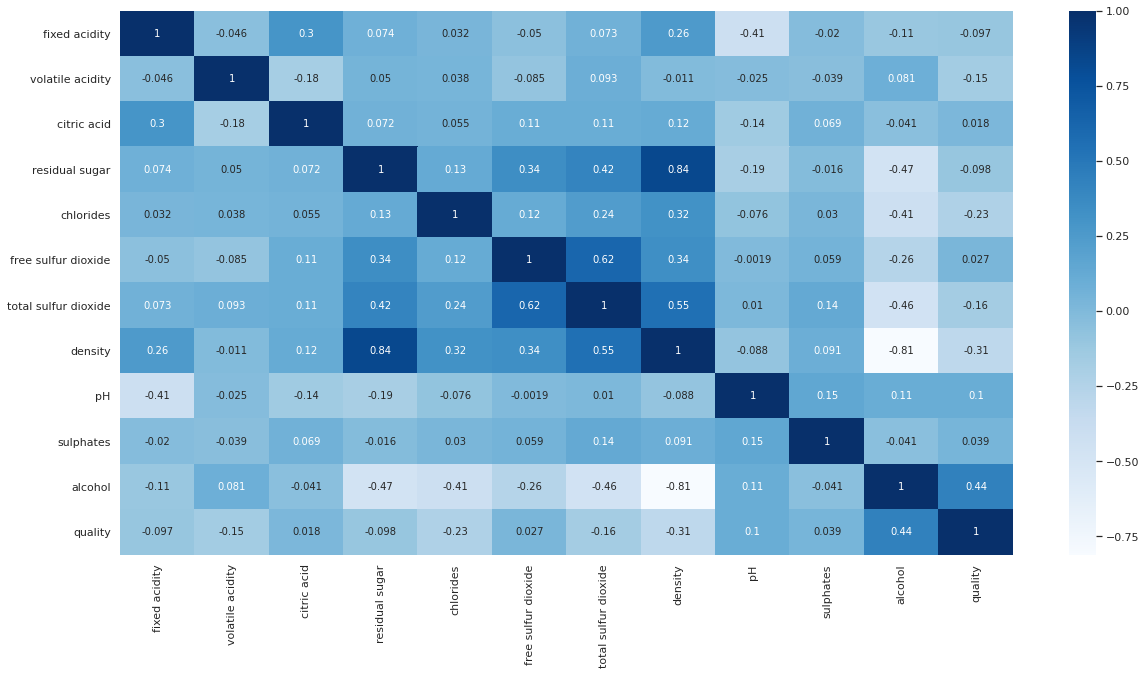

In [79]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), cmap='Blues', annot = True)

## Preparation for Training and Testing

Dropping: citric acid, residual sugar, free sulfur dioxide, pH, sulphates

In [80]:
cleaned_dataset = dataset.copy()
cleaned_dataset = cleaned_dataset[['fixed acidity', 'volatile acidity', 'citric acid', 
       'chlorides', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol']]

#### Defining dependent and independent variables

In [81]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

#### Splitting the dataset into the Training and Test set

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models

### 1. Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_pred = lin_regressor.predict(X_test)

In [86]:
lin_score = r2_score(y_test, y_pred)
lin_score = "{:.2f} %".format(lin_score*100)

In [87]:
accuracies = cross_val_score(estimator = lin_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_lin_reg = "{:.2f} %".format(accuracies.mean()*100)

In [88]:
results_df = pd.DataFrame(data=[["Linear Regression", val_accuracy_score_lin_reg, lin_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,69.60 %,71.25 %


### 2. Polynomial Regression

In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
pol_regressor = LinearRegression()
pol_regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
y_pred = pol_regressor.predict(poly_reg.transform(X_test))

In [91]:
pol_score = r2_score(y_test, y_pred)
pol_score = "{:.2f} %".format(pol_score*100)

In [92]:
accuracies = cross_val_score(estimator = pol_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_pol_reg = "{:.2f} %".format(accuracies.mean()*100)

In [93]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", val_accuracy_score_pol_reg, pol_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,69.60 %,71.25 %
1,Polynomial Regression,69.60 %,77.95 %


### 3. Decision Tree Regression

In [94]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [95]:
y_pred = decision_tree_regressor.predict(X_test)

In [96]:
decision_tree_score = r2_score(y_test, y_pred)
decision_tree_score = "{:.2f} %".format(decision_tree_score*100)

In [97]:
accuracies = cross_val_score(estimator = decision_tree_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_decision_tree = "{:.2f} %".format(accuracies.mean()*100)

In [98]:
results_df_3 = pd.DataFrame(data=[["Decision Tree Regression", val_accuracy_score_decision_tree, decision_tree_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,69.60 %,71.25 %
1,Polynomial Regression,69.60 %,77.95 %
2,Decision Tree Regression,70.30 %,71.57 %


### 4. Random Forest Regression

In [99]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [100]:
y_pred = random_forest_regressor.predict(X_test)

In [101]:
random_forest_score = r2_score(y_test, y_pred)
random_forest_score = "{:.2f} %".format(random_forest_score*100)

In [102]:
accuracies = cross_val_score(estimator = random_forest_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_random_forest = "{:.2f} %".format(accuracies.mean()*100)

In [103]:
results_df_4 = pd.DataFrame(data=[["Random Forest Regression", val_accuracy_score_random_forest, random_forest_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,69.60 %,71.25 %
1,Polynomial Regression,69.60 %,77.95 %
2,Decision Tree Regression,70.30 %,71.57 %
3,Random Forest Regression,82.84 %,82.93 %


### 5. XGBoost

In [104]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(objective ='reg:squarederror')
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [105]:
y_pred = xgb_regressor.predict(X_test)

In [106]:
xgb_score = r2_score(y_test, y_pred)
xgb_score = "{:.2f} %".format(xgb_score*100)

In [107]:
accuracies = cross_val_score(estimator = xgb_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb = "{:.2f} %".format(accuracies.mean()*100)

In [108]:
results_df_5 = pd.DataFrame(data=[["XGBoost", val_accuracy_score_xgb, xgb_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,69.60 %,71.25 %
1,Polynomial Regression,69.60 %,77.95 %
2,Decision Tree Regression,70.30 %,71.57 %
3,Random Forest Regression,82.84 %,82.93 %
4,XGBoost,79.45 %,80.32 %


### 6. CatBoost

In [109]:
from catboost import CatBoostRegressor
cat_regressor = CatBoostRegressor()
cat_regressor.fit(X_train, y_train)

Learning rate set to 0.048651
0:	learn: 1.1888126	total: 49.6ms	remaining: 49.5s
1:	learn: 1.1515961	total: 51.7ms	remaining: 25.8s
2:	learn: 1.1152112	total: 53.5ms	remaining: 17.8s
3:	learn: 1.0827698	total: 55.4ms	remaining: 13.8s
4:	learn: 1.0516129	total: 57.3ms	remaining: 11.4s
5:	learn: 1.0205576	total: 59.2ms	remaining: 9.8s
6:	learn: 0.9931581	total: 60.9ms	remaining: 8.64s
7:	learn: 0.9659638	total: 62.8ms	remaining: 7.79s
8:	learn: 0.9415681	total: 64.6ms	remaining: 7.11s
9:	learn: 0.9179607	total: 66.4ms	remaining: 6.57s
10:	learn: 0.8956799	total: 68.1ms	remaining: 6.12s
11:	learn: 0.8761262	total: 69.8ms	remaining: 5.75s
12:	learn: 0.8578109	total: 71.7ms	remaining: 5.44s
13:	learn: 0.8404062	total: 73.5ms	remaining: 5.18s
14:	learn: 0.8243126	total: 75.3ms	remaining: 4.94s
15:	learn: 0.8087126	total: 77.4ms	remaining: 4.76s
16:	learn: 0.7935796	total: 79.5ms	remaining: 4.59s
17:	learn: 0.7786008	total: 81.3ms	remaining: 4.43s
18:	learn: 0.7661621	total: 83.1ms	remaining:

In [110]:
y_pred = cat_regressor.predict(X_test)

In [111]:
cat_score = r2_score(y_test, y_pred)
cat_score = "{:.2f} %".format(cat_score*100)

In [112]:
accuracies = cross_val_score(estimator = cat_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_cat = "{:.2f} %".format(accuracies.mean()*100)

Streaming output truncated to the last 5000 lines.
4:	learn: 1.0553581	total: 8.54ms	remaining: 1.7s
5:	learn: 1.0247157	total: 10.3ms	remaining: 1.7s
6:	learn: 0.9979155	total: 11.9ms	remaining: 1.69s
7:	learn: 0.9713053	total: 13.5ms	remaining: 1.67s
8:	learn: 0.9468882	total: 15.2ms	remaining: 1.67s
9:	learn: 0.9244621	total: 16.9ms	remaining: 1.67s
10:	learn: 0.9025380	total: 18.6ms	remaining: 1.67s
11:	learn: 0.8819158	total: 20.1ms	remaining: 1.66s
12:	learn: 0.8626680	total: 21.7ms	remaining: 1.65s
13:	learn: 0.8448341	total: 23.4ms	remaining: 1.65s
14:	learn: 0.8288133	total: 25.1ms	remaining: 1.65s
15:	learn: 0.8133208	total: 31ms	remaining: 1.9s
16:	learn: 0.7989494	total: 32.8ms	remaining: 1.9s
17:	learn: 0.7847318	total: 34.5ms	remaining: 1.88s
18:	learn: 0.7708373	total: 36.3ms	remaining: 1.88s
19:	learn: 0.7586186	total: 38.4ms	remaining: 1.88s
20:	learn: 0.7467024	total: 40.6ms	remaining: 1.89s
21:	learn: 0.7351644	total: 43ms	remaining: 1.91s
22:	learn: 0.7246872	total:

In [113]:
results_df_5 = pd.DataFrame(data=[["CatBoost", val_accuracy_score_cat, cat_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,69.60 %,71.25 %
1,Polynomial Regression,69.60 %,77.95 %
2,Decision Tree Regression,70.30 %,71.57 %
3,Random Forest Regression,82.84 %,82.93 %
4,XGBoost,79.45 %,80.32 %
5,CatBoost,83.46 %,84.17 %


## XGBoost - Hyperparameter Tuning

In [114]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(X_train, y_train):
    parameters = {
        'colsample_bytree': [0.5, 0.7, 1],
        'gamma': [0, 1, 9],
        'learning_rate': [0.01, 0.1],
        'max_depth': [1, 3, 5, 7, 18],
        'min_child_weight': [0, 1, 3, 5, 10],
        'n_estimators' : [100, 150, 180],
        'objective': ['reg:squarederror'], 
        'reg_alpha': [1, 40, 100, 180],
        'reg_lambda': [0, 1]
    }

    xgb_regressor = XGBRegressor()

    grid_search = GridSearchCV(estimator = xgb_regressor,
                           param_grid = parameters,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    grid_search.fit(X_train, y_train)

    return grid_search.best_params_

In [115]:
hyperparameter_tuning(X_train, y_train)

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1558 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2458 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3558 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4858 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 5906 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 7482 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 9382 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 11468 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 13206 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 15706 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 17930 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 20718 tasks  

{'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 18,
 'min_child_weight': 5,
 'n_estimators': 180,
 'objective': 'reg:squarederror',
 'reg_alpha': 1,
 'reg_lambda': 0}

In [116]:
xgb_regressor = XGBRegressor(colsample_bytree = 1,
                              gamma = 0,
                              learning_rate = 0.1,
                              max_depth = 18,
                              min_child_weight = 5,
                              n_estimators = 180,
                              objective = 'reg:squarederror',
                              reg_alpha = 1,
                              reg_lambda = 0)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=18, min_child_weight=5, missing=None, n_estimators=180,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=1, reg_lambda=0, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [117]:
y_pred = xgb_regressor.predict(X_test)

In [118]:
xgb_score_tuned = r2_score(y_test, y_pred)
xgb_score_tuned = "{:.2f} %".format(xgb_score_tuned*100)

In [119]:
accuracies = cross_val_score(estimator = xgb_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb_tunded = "{:.2f} %".format(accuracies.mean()*100)

In [120]:
results_df_6 = pd.DataFrame(data=[["XGBoost Tuned", val_accuracy_score_xgb_tunded, xgb_score_tuned]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,69.60 %,71.25 %
1,Polynomial Regression,69.60 %,77.95 %
2,Decision Tree Regression,70.30 %,71.57 %
3,Random Forest Regression,82.84 %,82.93 %
4,XGBoost,79.45 %,80.32 %
5,CatBoost,83.46 %,84.17 %
6,XGBoost Tuned,84.61 %,85.60 %
